In [1]:
import pandas as pd
import numpy as np

In [2]:
animals = pd.read_csv('data/animals.csv')

In [3]:
animals

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf
...,...,...,...
57,160.004,169.000,Brazilian_tapir
58,0.900,2.600,Tenrec
59,1.620,11.400,Phalanger
60,0.104,2.500,Tree_shrew


In [4]:
animals.info(memory_usage='low')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
brainwt    62 non-null float64
bodywt     62 non-null float64
animal     62 non-null object
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [5]:
animals['brainwt'] = animals['brainwt'].astype('float32')

In [6]:
animals.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
brainwt    62 non-null float32
bodywt     62 non-null float64
animal     62 non-null object
dtypes: float32(1), float64(1), object(1)
memory usage: 4.9 KB


In [7]:
stats = animals.describe()

In [8]:
animals.max()

brainwt                  6654.18
bodywt                   5711.86
animal     Yellow-bellied_marmot
dtype: object

In [9]:
animals.brainwt.max()

6654.18

In [10]:
animals.min()

brainwt               0.005
bodywt                 0.14
animal     African_elephant
dtype: object

In [11]:
animals.brainwt.min()

0.005

In [12]:
animals[animals['brainwt'] == animals['brainwt'].min()]['animal']

13    Lesser_short-tailed-shrew
Name: animal, dtype: object

In [13]:
animals.var()

brainwt    808528.875000
bodywt     865418.787715
dtype: float64

In [14]:
animals.median()

brainwt     3.3425
bodywt     17.2500
dtype: float64

In [15]:
animals.quantile(0.5)

brainwt     3.3425
bodywt     17.2500
Name: 0.5, dtype: float64

In [16]:
animals.quantile(0.25)

brainwt    0.60
bodywt     4.25
Name: 0.25, dtype: float64

In [17]:
animals.quantile(0.75)

brainwt     48.20125
bodywt     165.99825
Name: 0.75, dtype: float64

In [18]:
stats

,brainwt,bodywt
count,62.000000,62.000000
mean,198.794312,283.135355
std,899.182312,930.278876
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.201250,165.998250
max,6654.180176,5711.860000


In [19]:
animals.quantile(0.5)==animals.median()

brainwt    True
bodywt     True
dtype: bool

In [20]:
animals.brainwt.quantile(0)==animals.brainwt.min()

True

In [21]:
animals.brainwt.quantile(1)==animals.brainwt.max()

True

<AxesSubplot:>

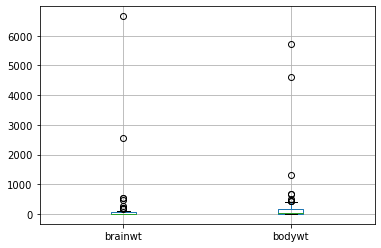

In [22]:
animals.boxplot()

In [23]:
stats = stats.T

In [24]:
stats['IQR'] = stats['75%']- stats['25%']


In [25]:
stats['75%'] - stats['25%']

brainwt     47.60125
bodywt     161.74825
dtype: float64

In [26]:
stats['IQR'] = stats['75%'] - stats['25%']
stats['IQR1.5'] = 1.5*stats['IQR']+stats['75%']
stats['IQR1.5n'] = stats['25%']-1.5*stats['IQR']
stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5,IQR1.5n
brainwt,62.0,198.794312,899.182312,0.005,0.60,3.3425,48.20125,6654.180176,47.60125,119.603125,-70.801875
bodywt,62.0,283.135355,930.278876,0.140,4.25,17.2500,165.99825,5711.860000,161.74825,408.620625,-238.372375


In [27]:
animals = animals[(animals['brainwt'] > -70.8)& (animals['brainwt']< 119.60)]
animals = animals[(animals['bodywt'] > -238.3)& (animals['bodywt']< 408.62)]

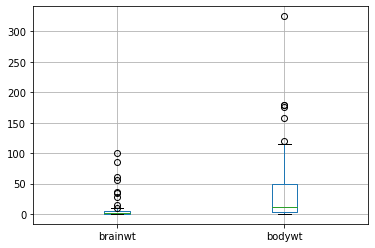

In [29]:
animals.boxplot();

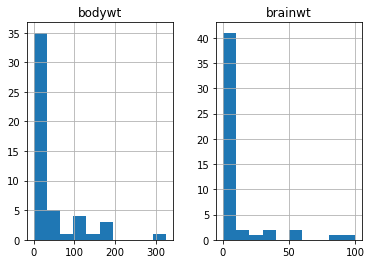

In [33]:
animals.hist();

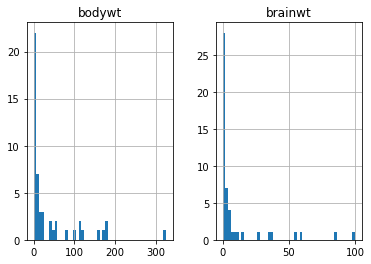

In [35]:
animals.hist(bins = 50);

In [37]:
from scipy.stats import norm, kurtosis

In [42]:
kurtosis(animals['brainwt'])

7.420409392946455

In [43]:
kurtosis(animals['bodywt'])

5.628636542090433

In [44]:
from scipy.stats import skew

In [45]:
skew(animals['bodywt'])

2.2999822093741007

In [47]:
skew(animals['brainwt'])

2.828979253768921

In [48]:
animals.corr()

,brainwt,bodywt
brainwt,1.000000,0.770494
bodywt,0.770494,1.000000


In [50]:
animals[(animals['brainwt'] == animals['brainwt'].min())|(animals['brainwt'] == animals['brainwt'].max())]

,brainwt,bodywt,animal
13,0.005000,0.140,Lesser_short-tailed-shrew
44,100.002998,156.993,Jaguar


In [ ]:
#!= "Negacion"
#~

In [55]:
animals[(animals['bodywt'] > 80) & ((animals['bodywt'] < 100) & (animals['bodywt'] > 40))]

,brainwt,bodywt,animal
6,14.831000,98.199,Roe_deer
48,59.997002,80.996,Giant_armadillo


In [56]:
from scipy import stats

In [57]:
stats.tmean(animals['bodywt'],(20,300))

90.52294117647061

In [58]:
stats.tvar(animals['bodywt'],(20,300))

3215.0864499338236

In [62]:
stats.tmin(animals['bodywt'], lowerlimit=20)

21.0

In [68]:
stats.tmax(animals['bodywt'], upperlimit= animals['brainwt'].max())

98.199

In [72]:
maxi = animals['brainwt'].max()

In [66]:
stats.tstd(animals['bodywt'], limits=(20,300))

56.701732336268385

In [67]:
stats.variation(animals['bodywt'])

1.5890964501833051

In [70]:
eval("1 + 2")

3

In [73]:
eval("maxi + 20 ")

120.00299835205078

In [74]:
eval("[i for i in range(10)]")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [75]:
x = [i for i in range(10)]

In [82]:
y = [i for i in range(10,21)]

In [83]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
y

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [86]:
eval("list(zip(x,y))")

[(0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19)]

In [87]:
import math

In [88]:
eval("math.pi*3")

9.42477796076938

In [92]:
eval("[(lambda x:x**2)(x) for x in y]")

[100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]

In [93]:
def suma(x):
    return x+2

In [95]:
res = eval("[suma(x) for x in y]")

In [97]:
res

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [101]:
code = compile("9+6*(4/3)", "<string>","eval")
code

<code object <module> at 0x000001F060159E40, file "<string>", line 1>

In [102]:
eval(code)

17.0

In [104]:
code = compile("4/3 * math.pi * math.pow(23,3)", "str", "eval")
eval(code)

50965.01042163601

In [105]:
animals[pd.eval('animals.bodywt > 30 & animals.brainwt < 80')]

,brainwt,bodywt,animal
0,3.385000,44.500,Arctic_fox
4,36.327999,119.498,Gray_wolf
5,27.660000,114.996,Goat
6,14.831000,98.199,Roe_deer
8,4.190000,57.998,Vervet
23,10.000000,114.996,Patas_monkey
34,6.800000,179.003,Rhesus_monkey
35,34.998001,56.003,Kangaroo
43,55.500999,175.002,Sheep
46,10.550000,179.504,Baboon


In [110]:
animals.query('brainwt > 30 & bodywt < 100')

,brainwt,bodywt,animal
35,34.998001,56.003,Kangaroo
48,59.997002,80.996,Giant_armadillo


In [113]:
animals_new = animals.eval("""
ratio_wt = brainwt/bodywt
new_column = ratio_wt*2""")

In [115]:
eval(animals_new

,brainwt,bodywt,animal,ratio_wt,new_column
0,3.385000,44.500,Arctic_fox,0.076067,0.152135
1,0.480000,15.499,Owl_monkey,0.030970,0.061939
2,1.350000,8.100,Beaver,0.166667,0.333333
4,36.327999,119.498,Gray_wolf,0.304005,0.608010
5,27.660000,114.996,Goat,0.240530,0.481060
6,14.831000,98.199,Roe_deer,0.151030,0.302060
7,1.040000,5.500,Guinea_pig,0.189091,0.378182
8,4.190000,57.998,Vervet,0.072244,0.144488
9,0.425000,6.400,Chinchilla,0.066406,0.132813
10,0.101000,4.000,Ground_squirrel,0.025250,0.050500


In [118]:
with open('data/animals.csv','r') as f:
    f_read = f.readlines()
    
f_read

['brainwt,bodywt,animal\n',
 '3.385,44.5,Arctic_fox\n',
 '0.48,15.499,Owl_monkey\n',
 '1.35,8.1,Beaver\n',
 '464.983,423.012,Cow\n',
 '36.328,119.498,Gray_wolf\n',
 '27.66,114.996,Goat\n',
 '14.831,98.199,Roe_deer\n',
 '1.04,5.5,Guinea_pig\n',
 '4.19,57.998,Vervet\n',
 '0.425,6.4,Chinchilla\n',
 '0.101,4,Ground_squirrel\n',
 '0.92,5.7,Arctic\n',
 '1,6.6,African_giant_pouched_rat\n',
 '0.005,0.14,Lesser_short-tailed-shrew\n',
 '0.06,1,Star-nosed_mole\n',
 '3.5,10.8,Nine-banded_armadillo\n',
 '2,12.3,Tree_hyrax\n',
 '1.7,6.3,N._American\n',
 '2547.07,4603.17,Asian_elephant\n',
 '0.023,0.3,Big_brown_bat\n',
 '187.092,419.012,Donkey\n',
 '521.026,654.977,Horse\n',
 '0.785,3.5,European_hedgehog\n',
 '10,114.996,Patas_monkey\n',
 '3.3,25.6,Cat\n',
 '0.2,5,Galago\n',
 '1.41,17.5,Genet\n',
 '529.006,680.005,Giraffe\n',
 '206.996,406.019,Gorilla\n',
 '85.004,324.992,Gray_seal\n',
 '0.75,12.3,Rock_hyrax1\n',
 '61.998,1320.02,Human\n',
 '6654.18,5711.86,African_elephant\n',
 '3.5,3.9,Water_opossu

In [119]:
eval("animals_new.to_csv('data/animals_new.csv')")

In [120]:
eval("x=2, x*2")

SyntaxError: invalid syntax (<string>, line 1)

In [122]:
animals['brainkg'] = animals['brainwt']*0.4536
animals['bodykg'] = animals['bodywt']*0.4536

In [125]:
animals['wratio'] = np.where(animals['brainkg'] != 0, animals['brainkg']/ animals['bodykg'],0)
animals

,brainwt,bodywt,animal,brainkg,bodykg,wratio
0,3.385000,44.500,Arctic_fox,1.535436,20.185200,0.076067
1,0.480000,15.499,Owl_monkey,0.217728,7.030346,0.030970
2,1.350000,8.100,Beaver,0.612360,3.674160,0.166667
4,36.327999,119.498,Gray_wolf,16.478380,54.204293,0.304005
5,27.660000,114.996,Goat,12.546576,52.162186,0.240530
6,14.831000,98.199,Roe_deer,6.727342,44.543066,0.151030
7,1.040000,5.500,Guinea_pig,0.471744,2.494800,0.189091
8,4.190000,57.998,Vervet,1.900584,26.307893,0.072244
9,0.425000,6.400,Chinchilla,0.192780,2.903040,0.066406
10,0.101000,4.000,Ground_squirrel,0.045814,1.814400,0.025250


In [129]:
animals['animals_and'] = np.where((animals['brainwt'] > 15 )&(animals['brainwt'] < 100),
                      animals['bodywt']/animals['brainwt'],0)

In [133]:
animals['nested']= np.where(animals['brainwt'] > 15, animals['bodywt']/animals['brainwt'],
                           np.where(animals['brainwt'] < 10, animals['bodywt']*animals['brainwt'],0))

In [134]:
animals

,brainwt,bodywt,animal,brainkg,bodykg,wratio,animals_and,nested
0,3.385000,44.500,Arctic_fox,1.535436,20.185200,0.076067,0.000000,150.632500
1,0.480000,15.499,Owl_monkey,0.217728,7.030346,0.030970,0.000000,7.439520
2,1.350000,8.100,Beaver,0.612360,3.674160,0.166667,0.000000,10.935000
4,36.327999,119.498,Gray_wolf,16.478380,54.204293,0.304005,3.289419,3.289419
5,27.660000,114.996,Goat,12.546576,52.162186,0.240530,4.157484,4.157484
6,14.831000,98.199,Roe_deer,6.727342,44.543066,0.151030,0.000000,0.000000
7,1.040000,5.500,Guinea_pig,0.471744,2.494800,0.189091,0.000000,5.720000
8,4.190000,57.998,Vervet,1.900584,26.307893,0.072244,0.000000,243.011623
9,0.425000,6.400,Chinchilla,0.192780,2.903040,0.066406,0.000000,2.720000
10,0.101000,4.000,Ground_squirrel,0.045814,1.814400,0.025250,0.000000,0.404000


In [135]:
import sympy

In [136]:
math.sqrt(9)

3.0

In [137]:
math.sqrt(8)

2.8284271247461903

In [138]:
sympy.sqrt(9)

3

In [141]:
raiz = sympy.sqrt(8)

In [142]:
raiz**2

8

In [144]:
from sympy import symbols

In [145]:
x, y = symbols('x y')

In [154]:
ec = 2*x/2
ec

x

In [167]:
expr = x + 2*y

In [173]:
expr.subs([(x,2),(y,5)])

12

In [166]:
expr_2 = cos(x)

expr_2.subs(x, 4)

2*y + 4

In [ ]:
from sympy import *

In [157]:
diff(sin(x)*exp(x),x) #derivadas

exp(x)*sin(x) + exp(x)*cos(x)

In [158]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

exp(x)*sin(x)

In [ ]:
x+2y=3
3x+4y=17

In [178]:
A = np.array([[1,2],[3,4]])
b = np.array([3,17])

In [179]:
import scipy.linalg as la

In [180]:
x = la.solve(A,b)

In [181]:
np.allclose(A @ x, b)

True

In [182]:

A = np.array([[1,0.6],[0.6,4]])
A


array([[1. , 0.6],
       [0.6, 4. ]])

In [183]:
p,l,u = la.lu(A)

In [185]:
l

array([[1. , 0. ],
       [0.6, 1. ]])

In [186]:
u

array([[1.  , 0.6 ],
       [0.  , 3.64]])

In [187]:

U = la.cholesky(A)
U


array([[1.       , 0.6      ],
       [0.       , 1.9078784]])

In [ ]:
la.svd

In [188]:
from scipy import integrate

In [189]:
f = lambda x: 12*x

In [190]:
res = integrate.quad(f, 0,1)

In [191]:
res

(6.0, 6.661338147750939e-14)

In [192]:
f=lambda x, y : 12*x*1  # y=1

res=integrate.dblquad(f, 0, 0.5, lambda x: 0, lambda x: 1)

res

(3.0, 6.661338147750939e-14)

In [193]:
from scipy.optimize import minimize

In [194]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]))**2.

In [197]:
x0 = np.array([1.3,0.7,0.6,1.2,0.6])

res = minimize(rosen,x0, method = 'nelder-mead', options = {'xtol':1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 132
         Function evaluations: 261


In [199]:
x = np.linspace(0,5,12)
y = np.cos(x**2/3+4)
print(x,y)

[0.         0.45454545 0.90909091 1.36363636 1.81818182 2.27272727
 2.72727273 3.18181818 3.63636364 4.09090909 4.54545455 5.        ] [-0.65364362 -0.60001388 -0.42313893 -0.09242219  0.37976236  0.84649879
  0.9808235   0.46118122 -0.52586509 -0.98820612 -0.10830906  0.97296947]


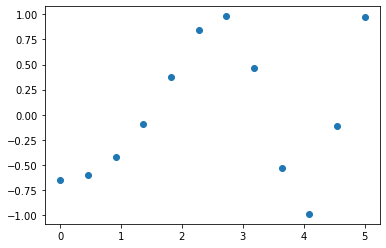

In [206]:
plt.plot(x,y,'o')

In [200]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [207]:
from scipy.interpolate import interp1d

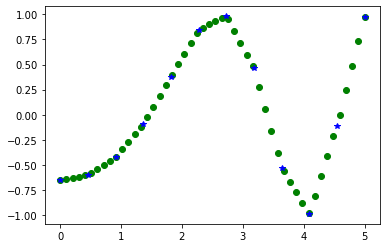

In [210]:
f = interp1d(x,y)

xnew = np.linspace(0,5,50,endpoint=True)
ynew = f(xnew)

plt.plot(xnew,ynew, 'go')
plt.plot(x,y,'b*')

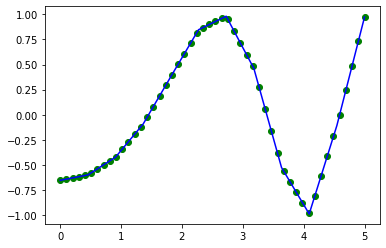

In [211]:
f = interp1d(x,y)

xnew = np.linspace(0,5,50,endpoint=True)
ynew = f(xnew)

plt.plot(xnew,ynew, 'go')
plt.plot(x,y,'b-')

In [212]:
s1=signal.firwin(40, 0.5)  # señal
s2=signal.firwin(41, [0.3, 0.8])
f1, w1=signal.freqz(s1)  # separar frecuencia y fase
f2, w2=signal.freqz(s2)

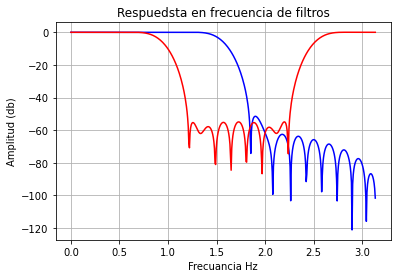

In [213]:
plt.title('Respuedsta en frecuencia de filtros')
plt.plot(f1, 20*np.log10(np.abs(w1)), 'b')  # x=frecuencia, y=amplitud en db
plt.plot(f2, 20*np.log10(np.abs(w2)), 'r')
plt.ylabel('Amplitud (db)')
plt.xlabel('Frecuancia Hz')
plt.grid()
plt.show();